In [119]:
from ArticlesRep import MeanSimilarity

import pandas as pd

import numpy as np

%matplotlib inline

import pickle

import visdom

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

from time import time,sleep
from datetime import datetime

from sklearn.metrics.pairwise import cosine_similarity
# import visdom
# vis=visdom.Visdom()
# env="TagBased"

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# %matplotlib inline

import re

from pprint import pprint
#coding:utf-8
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'
list_industry=["水泥","食品飲料","石化","紡織","電機機械","電器電纜","化學工業",
               "建材居家用品","造紙","鋼鐵金屬","車輛相關","科技相關","營建地產","運輸","觀光休閒娛樂",
               "金融相關","百貨通路","公用事業","控股","生技醫療保健","農林漁牧","航天軍工","能源","傳播出版","綜合",
               "傳產其他","其他","金屬礦採選",
              ]

## load Dataset

In [4]:
with open("D:3.AutoencoderForArticle/DataSet_vip_single_industry","rb") as f:
    DataSet=pickle.load(f)

In [5]:
len(DataSet)

154884

In [5]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154884 entries, 0 to 154883
Data columns (total 3 columns):
guid                           154884 non-null object
title_token_plus_body_token    154884 non-null object
indusrty_tags                  154884 non-null object
dtypes: object(3)
memory usage: 3.5+ MB


In [6]:
_=DataSet["title_token_plus_body_token"]
_=_.value_counts()
_.reset_index().rename(columns={"index":"title_token_plus_body_token","title_token_plus_body_token":"counts"})

,title_token_plus_body_token,counts
0,美股 指數期貨 最新 報價 指數 漲跌 漲跌幅 資料 時間 時間 DJ IA INDEX a...,3074
1,股東會 資訊 好消息 台 總 報給 您 知 總 股份有限公司 徵求 股東會 委託書 提供 紀...,47
2,理財 短波 線上 開戶 首選 合庫 讓 您 證券 開戶 更 便利 合庫 證券 去 正式 啟動...,10
3,理財 短波 線上 開戶 首選 合庫 讓 您 證券 開戶 更 便利 合庫 證券 於今 正式 啟...,7
4,嘉實 學院 課程 招生 投資 美股 研習班 嘉實 學院 首次 開辦 美股 課程 特別 邀請 ...,7
5,理財 短波 線上 開戶 首選 合庫 讓 您 證券 開戶 更 便利 合庫 證券 於今 正式 啟...,5
6,日本 銀行 放款 餘額 年減 連 個 下滑 根據 日本央行 BOJ 公佈 日本 全 國 銀行...,4
7,日本經濟 銀行 放款 額 年增 連 個 增長 根據 日本央行 BOJ 公佈 日本 全 國 銀...,4
8,日本經濟 銀行 放款 餘額 年減 連 個 下滑 根據 日本央行 BOJ 公佈 日本 全 國 ...,3
9,日本央行 決議 短期 利率 誘導 目標 維持 不變 日本央行 BOJ 分 當地 時間 發佈 ...,3


In [310]:
# with open("D:3.AutoencoderForArticle/testset_vip.v01.p","wb") as f:
#     pickle.dump(file=f,obj=trainset_vip)

In [311]:
# with open("D:3.AutoencoderForArticle/testset_vip.v01.p","rb") as f:
#     x=pickle.load(f)

### Vectorization

In [21]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [62]:
texts = DataSet["title_token_plus_body_token"]
tokenizer = Tokenizer(num_words=20000,)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# word_index

Found 272511 unique tokens.


In [29]:
_=pd.Series(tokenizer.word_counts)
_.sort_values(ascending=False,inplace=True)

In [61]:
_[:20000][[0,1,2,3,4,5,-6,-5,-4,-3,-2,-1]]

營收       252141
億元       209036
今年       202674
表示       187343
市場       180937
公司       158782
短空           99
房仲業          99
支持率          99
天膠           99
效用           99
led基板        99
dtype: int64

In [68]:
_=pd.Series(tokenizer.word_docs)
_.sort_values(ascending=False,inplace=True)
_[:20000][[0,1,2,3,4,5,-6,-5,-4,-3,-2,-1]]

表示      95150
而       77839
市場      75096
今年      71997
指出      71724
公司      67069
愈加         70
施打         70
有信心的       70
可延長        70
呈報         70
數位經濟       70
dtype: int64

In [70]:
one_hot_results = tokenizer.texts_to_matrix(texts, mode='binary')
one_hot_results

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [88]:
one_hot_results=one_hot_results.astype(int)

In [90]:
one_hot_results

dtype('int32')

### Save one_hot_results 

In [91]:
# np.save("D:3.AutoencoderForArticle/BOW_binary_v01.npy",one_hot_results)

#### Load BOW_binary_v01

In [6]:
BOW_binary=np.load("D:3.AutoencoderForArticle/BOW_binary_v01.npy")

In [7]:
#sparcity
sparcity=np.mean(BOW_binary)
print("{}%".format(np.round(sparcity,5)*100))

0.616%


In [8]:
np.sum(BOW_binary[69520])

203

## Build Model

In [138]:
from keras.layers import Input, Dense
from keras.models import Model,load_model
from keras.losses import mean_absolute_error
input_dim=20000
hidden_dim=500
input_text = Input(shape=(input_dim,),name="Input")
# "encoded" is the encoded representation of the input
encoded = Dense(hidden_dim, activation='relu',name="Encoder")(input_text)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(input_dim, activation='sigmoid',name="Decoder")(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_text, outputs=decoded)
#compile
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=[mean_absolute_error])
# autoencoder.compile(optimizer='adadelta', loss='mse')
#summary
autoencoder.summary()
#save initial weights
autoencoder.save('autoencoder.initial.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 20000)             0         
_________________________________________________________________
Encoder (Dense)              (None, 500)               10000500  
_________________________________________________________________
Decoder (Dense)              (None, 20000)             10020000  
Total params: 20,020,500
Trainable params: 20,020,500
Non-trainable params: 0
_________________________________________________________________


In [19]:
#plot model
from keras import utils
utils.plot_model(autoencoder, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB')

In [130]:
# this model maps an input to its encoded representation
encoder = Model(inputs=input_text, outputs=encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 20000)             0         
_________________________________________________________________
Encoder (Dense)              (None, 500)               10000500  
Total params: 10,000,500
Trainable params: 10,000,500
Non-trainable params: 0
_________________________________________________________________


In [314]:
# create a placeholder for an encoded input
encoded_input = Input(shape=(hidden_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(inputs=encoded_input, outputs=decoder_layer(encoded_input))
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 500)               0         
_________________________________________________________________
Decoder (Dense)              (None, 20000)             10020000  
Total params: 10,020,000
Trainable params: 10,020,000
Non-trainable params: 0
_________________________________________________________________


### TrainSet and TestSet prepare

In [20]:
# random pick 10000 pieces
seed=5
train_num=10000
vali_num=2000
total=DataSet.shape[0]
np.random.seed(seed)
picksample=np.random.permutation(total)[:train_num+vali_num]
print(picksample)
__ = DataSet.iloc[picksample]["indusrty_tags"]

[ 15951 142149  67130 ... 110412 127935 106828]


In [139]:
#Save picksample
# picksample=np.save("D:3.AutoencoderForArticle/picksample",picksample)

In [21]:
dict_={k:0 for k in list_industry}
for t in tqdm_notebook(__):
#     print(t)
    for i in dict_:
        if i in t:dict_[i]+=1
ser=pd.Series(dict_)
ser.sort_values(ascending=False)

科技相關      6499
金融相關      1224
鋼鐵金屬      1030
車輛相關       392
生技醫療保健     341
營建地產       322
百貨通路       301
傳播出版       288
電機機械       214
能源         204
傳產其他       172
觀光休閒娛樂     166
紡織         145
運輸         117
化學工業        88
石化          86
公用事業        80
食品飲料        70
農林漁牧        66
造紙          55
水泥          49
建材居家用品      43
電器電纜        24
航天軍工        18
綜合           6
金屬礦採選        0
控股           0
其他           0
dtype: int64

In [22]:
x_train=BOW_binary[picksample[:train_num]]

In [23]:
x_test=BOW_binary[picksample[train_num:train_num+vali_num]]

# Metric before Train

In [24]:
metrics_train=np.mean(np.absolute(x_train[0:1]-autoencoder.predict(x_train[0:1])))
metrics_test=np.mean(np.absolute(x_test-autoencoder.predict(x_test)))
metrics_train_on_zeros=np.mean(np.absolute(x_train-np.zeros_like(x_train)))
metrics_test_on_zeros=np.mean(np.absolute(x_test-np.zeros_like(x_test)))
print(metrics_train)
print(metrics_test)
print(metrics_train_on_zeros)
print(metrics_test_on_zeros)

0.49998945652246474
0.49999515444225073
0.006155465
0.006165625


## Train  

In [337]:
from keras_tqdm import TQDMNotebookCallback
#callback
checkpointer = ModelCheckpoint(filepath="best_model_autoencoder.hdf5",save_weights_only=False,
                               monitor='val_loss',verbose=1, save_best_only=True,period=5)
#fit
epochs=1
batch_size=526
history=autoencoder.fit(x_train, x_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        verbose=0,
                        callbacks=[TQDMNotebookCallback(),
#                                    checkpointer,
                                  ],
#                         validation_data=(x_test, x_test),
                        
                       )

In [104]:
autoencoder.predict(x_train_small[0:1])

array([[0.5001104 , 0.5005486 , 0.4943131 , ..., 0.5008923 , 0.50556505,
        0.50266695]], dtype=float32)

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


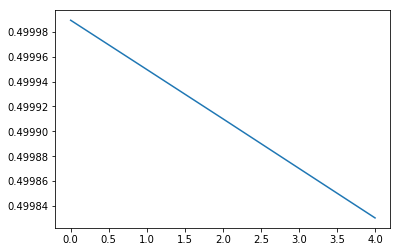

In [99]:
df=pd.DataFrame(autoencoder.history.history)
df["mean_absolute_error"][:].plot()

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


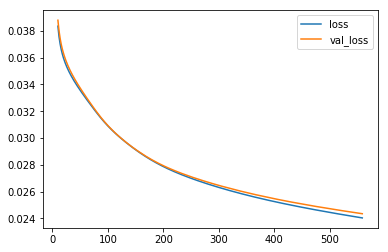

In [44]:
df[10:].plot()

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


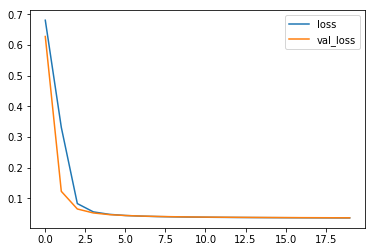

In [47]:
df[:20].plot()

# Metrics Mean Square Error

In [133]:
from keras.models import load_model
autoencoder=load_model("best_weights.hdf5")

In [134]:
metrics_train=np.mean(np.absolute(x_train-autoencoder.predict(x_train)))
metrics_test=np.mean(np.absolute(x_test-autoencoder.predict(x_test)))
metrics_train_on_zeros=np.mean(np.absolute(x_train-np.zeros_like(x_train)))
metrics_test_on_zeros=np.mean(np.absolute(x_test-np.zeros_like(x_test)))
print(metrics_train)
print(metrics_test)
print(metrics_train_on_zeros)
print(metrics_test_on_zeros)

0.010405419483097882
0.010524329580267127
0.006155465
0.006165625


# Similary Encoded_vector

In [28]:
picksample

array([ 15951, 142149,  67130, ..., 110412, 127935, 106828])

### build encoder

In [135]:
from keras.layers import Input
from keras.models import Model
encoder_layer=autoencoder.layers[1]
# Data flow
input_x=Input((20000,))
out=encoder_layer(input_x)
encoder = Model(inputs=input_x, outputs=out)

In [30]:
x_encoded=encoder.predict(x_train)

In [31]:
simi=cosine_similarity(x_encoded)

In [50]:
simi_argsort=np.argsort(simi*(-1))
simi_argsort

array([[   0, 9413, 7301, ..., 1746,  812, 3944],
       [   1, 9855, 5144, ..., 2106, 5443,  481],
       [   2, 7018, 4734, ..., 3358, 1746, 4892],
       ...,
       [9997, 4304, 5584, ...,  801, 4892, 1746],
       [9998,  155, 3838, ..., 3773,  207, 3499],
       [9999, 9162, 2263, ..., 5443,  481, 1746]], dtype=int64)

In [35]:
DataSet.iloc[picksample[simi_argsort][0]]

,guid,title_token_plus_body_token,indusrty_tags
15951,85958458-0fdf-4ad4-b3b3-b2d1bd0a4aca,直得 月營收 估可 彈升 明年 營運 續 成長 隨著 年底 半導體 經銷商 客戶 回補 庫存...,{電機機械}
7016,5674c7e3-9cb7-4465-87ac-737254f987e9,亞德 客 月營收 動能 看穩 明年 迎 旺季 隨著 工作 天數 回升 亞德客 KY 合併 營...,{電機機械}
2734,3cf27046-11e6-49d2-8e26-1634db626ed3,陸 電子廠 訂單 發酵 固緯 下半年 營運 迎 旺季 固緯 營收 雖為 淡季 表現 毛利率 ...,{科技相關}
23994,923ceea4-6243-429f-b21a-9d56599b80dc,亞崴 營收 估 逐月 墊高 隱含 殖利率 隨著 去年 所接 訂單 陸續 發酵 法人 看好 亞...,{電機機械}
15632,06735a6e-3f45-41f7-a075-7caa8398c34e,旭隼 EPS 明年 新興市場 回溫 迎 成長 UPS 代工 大廠 旭隼 今年 營收 佔 比較...,{科技相關}
7158,526a229e-3487-4068-b776-d60ed5019760,桓達 毛利率 估 改善 明年 成長動能 可期 桓達 提列 呆滯 庫存 導致 毛利率 降至 以...,{電機機械}
15548,522c9080-d231-4937-926b-952d3cacd31d,僑威 獲利 可季增 今年 營 收看 高個 位數 成長 電源 廠商 僑威 去年 第四季 營收 ...,{科技相關}
14047,1786beb4-f54e-466c-8396-5466a716c771,羽絨 成衣 展望 佳 光隆 拚 轉盈 看旺 受 大陸 再度 爆發 禽流感 疫情 影響 羽絨 ...,{紡織}
18048,e8592595-73b2-4613-9065-4b020223f684,廣華 KY 回溫 增溫 惟 全年 營收 衰退 汽車 塑膠 內飾件 射出 成型 廠商 廣華 K...,{車輛相關}
78195,7e7ab874-49b5-43d5-9055-ca4a0a6db746,油脂 沖 調 飲品 入 淡季 佳格 營收 估 下滑 食品 油脂 大廠 佳格 今年 第一季 每...,{食品飲料}


In [37]:
DataSet.iloc[picksample[simi_argsort][np.where(picksample==14047)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
14047,1786beb4-f54e-466c-8396-5466a716c771,羽絨 成衣 展望 佳 光隆 拚 轉盈 看旺 受 大陸 再度 爆發 禽流感 疫情 影響 羽絨 ...,{紡織}
36067,57d79161-747d-4255-b991-4f48c75c800f,產品組合 優化 華立 毛利率 估增 營運 不淡 受惠 產品組合 優化 法人 半導體材料通路商...,{科技相關}
7495,3c86b0d4-df71-40f4-aa88-13d561860635,東鋼 獲 利淡 看 回溫 關注 越南 新線 後續 效益 東和鋼鐵 合併 營收 雖 來到 季 ...,{鋼鐵金屬}
2734,3cf27046-11e6-49d2-8e26-1634db626ed3,陸 電子廠 訂單 發酵 固緯 下半年 營運 迎 旺季 固緯 營收 雖為 淡季 表現 毛利率 ...,{科技相關}
1279,f5ed7aa0-012a-4691-b993-90025fd79fb6,尼龍 粒 加工絲 轉旺 集盛 營運 看佳 近期 CPL 價格 止穩 上揚 帶動 尼龍 粒 開...,{紡織}
20646,0e295590-0636-4e69-aa8b-08d7f6d8b7ca,國精化 產品 單價 回升 全年 獲利 看 雙位數 成長 國精化 上游 原料 漲價 帶動 產品...,{化學工業}
95131,65568d0a-03ee-402e-bf85-1603966ed338,崇越 營收 目標 小增 下半年 較 上半年 好 一些 半導體 材料 廠商 崇越 上半年 營業...,{科技相關}
117461,3fc627ee-2c98-4685-95fd-1d59d23abaed,Mosfet 需求 熱 富鼎 營收 逐月 改寫 年度 新高 Mosfet 供應商 富鼎 表示...,{科技相關}
153384,98993702-b375-461f-9887-2256dda97b12,沖 調 飲品 旺季 佳格 業績 增溫 沖 飲品 大廠 佳格 第四季 沖 飲料 進入 冬天 傳...,{食品飲料}
32919,395588d9-caf0-434b-a5f3-b6db187696fe,歐元 貶值 埃及 線 回溫 鳳凰 今年 毛利率 看升 歐元 近期 大幅 貶值 可望 帶動 赴...,{觀光休閒娛樂}


In [39]:
DataSet.iloc[picksample[simi_argsort][np.where(picksample==61956)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
61956,5e67a1e5-ea7c-448e-8280-0fb4d55bc696,企業 貸款 利率 差距 創新高 歐元 太強 南歐 病 奄奄 歐洲經濟 真的 該 能力 分班 ...,{金融相關}
17261,77bcd7cf-2ed0-4d19-ac51-594a94b84e96,不敢 得罪 聯準會 BOJ 總裁 日銀 不能 買 美國 債券 歐洲央行 ECB 總裁 德拉吉...,{鋼鐵金屬}
34037,c5ca46c5-25f8-4c96-b5a7-6a1c1797359a,兆 美元 公債 利率 轉負 FT 作家 黃金 吸引力 升高 日本央行 BOJ 歐洲央行 EC...,{鋼鐵金屬}
67298,8eadc910-20ea-400c-852b-460aefd85ffe,匯市 德國 投資 信心 轉強 歐元 強升 瑞郎 下挫 歐元 相 對於 美元 日圓 日因 德國...,{鋼鐵金屬}
73234,eb733376-9fd0-45ae-8481-a0151f6459ef,堪薩斯 達拉斯 FED 總裁 憂心 美債 殖利率 未來 恐飆 雖然 野村 Nomura 高盛...,{金融相關}
76654,b3cdeb83-299c-49cd-82db-41803e221e4e,續用 QE 代價 匯豐 政府 不減 赤 經濟成長 乏力 近來 財經 媒體 經常 看到 討論 ...,{金融相關}
36410,88a9e559-e6d8-4904-b2e5-28b9b7dcafec,歐洲 版 國王 新衣 ECB 銀行 壓力 測試 未納 通縮 歐洲央行 ECB 歐元區 銀行業...,{金融相關}
92586,9cf2045c-9e24-4b13-957c-a711069d200a,康乃爾 大學教授 美元 長期 看 貶 美債 並 不安全 康乃爾 大學教授 Eswar Pra...,{金融相關}
81378,dd664301-01ae-47d8-a59c-cdba19bff127,歐債 危機 捲土重來 這次 換 西班牙 當 主角 投資人 請 別急 著 把 歐債 監視 雷達...,{金融相關}
19006,36f613e7-89d6-496b-81a4-7c2fde96977e,葉倫 傑克森 洞 談話 偏鷹 偏鴿 答案 似乎 已 呼之欲出 舊金山 聯邦 儲備銀行 總裁 ...,{鋼鐵金屬}


In [40]:
DataSet.iloc[picksample[simi_argsort][np.where(picksample==32783)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
32783,c727e3fc-9d8c-4a34-a51e-a0446a09e688,鮮活 今年 營 收看 有機 會續 創高 果汁 原料 大廠 鮮活 去年 營收 獲利 均 創新高...,{觀光休閒娛樂}
35727,509b2352-e012-4555-ac3d-a0c58e1b20b5,應華 拚 本業 轉盈 明年 營收 毛利率 估 跳升 金屬機殼 應華 科技 因應 數位相機 產...,{科技相關}
25970,86fd4828-d7af-41a7-9f43-036affcb6fc7,鮮活 步入 淡季 今年 獲利 可能 下滑 果汁 原料 大廠 鮮活 今年以來 受到 中國 景氣...,{觀光休閒娛樂}
22530,f6fb9924-4ebd-4641-847d-def248c4de5e,湖南 雷射 事業 併入 光群雷 營收 創高 雷射 材料 大廠 光群雷 射 科技 今年以來 併...,{科技相關}
123479,18529a08-5550-4f1b-b0e6-90cdcf217a91,嘉威 擴充 ITO 薄膜 聚光 片 產能 擬辦 私募 聚光 片廠 嘉威 去年 開始 切入 觸...,{科技相關}
38346,a76f8f70-18eb-46d6-a2a8-1b97a8170c08,宏亞 下半年 迎 旺季 今年 EPS 挑戰 食品 大廠 宏亞 今年 第二季 受 淡季 影響 ...,{食品飲料}
1699,09596567-6752-478f-ae1d-71b8bbbf9d7d,鼎元 上半年 營收 成長 預期 下半年 還有 動能 LED 廠商 鼎元 今年以來 感測元件 ...,{科技相關}
32745,ad0ef937-5109-443b-af1a-58cd109aba31,和鑫 力拼 今年 營運 平穩 預期 完成 減資 面板廠 瀚 宇彩晶 轉投資 觸控面板 和鑫 ...,{科技相關}
5018,ed10a5eb-2a36-41f7-aefa-3f9b62763282,敦南 月營收 看 回升 步入 出貨 旺季 敦南 月營收 億元 月減 年增 較前 下滑 主因 ...,{科技相關}
7752,5461cb48-6213-4ce1-aebd-a765e7078e9a,旺季 代工 成長 神準 下半年 回溫 明年 拚 復甦 神準 今年 三季 代工 訂單 出貨 擴...,{科技相關}


In [45]:
DataSet.iloc[picksample[simi_argsort][np.where(picksample==93656)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
93656,1c3fe943-0e5d-4477-bb3e-ebaf334123c6,凱撒衛 浴 日掛 興櫃 目標 年內 上市 玻陶類 難得 出現 掛牌 新兵 越南 生產 據點 ...,{建材居家用品}
15794,bad20a5b-2b4e-4ca8-b55d-3696a2333d2d,千如 通過 私募 將啟 動 第二階段 快速 發展 被動元件 電感 廠商 千如 召開 股東 臨...,{科技相關}
91806,f06aec50-1e1a-4c07-9bca-9486e707584b,台南 開曼 上櫃 品牌 效益 預期 明年 發酵 台南 企業 舉行 週年 慶祝 酒會 暨 自有...,{紡織}
96792,335fb9ba-4de1-48c1-ba30-eecbb096431f,IC 通路 併購 再起 大聯大 文曄 動向 受 關注 半導體 通路商 大聯大 上週 宣布 旗...,{科技相關}
118627,4a52f73f-098c-49b2-97a8-2a46732b17ba,正隆 世代交替 鄭舒云 接下 董座 職務 國內 造紙 大廠 正隆 於今 上午 召開 股東會 ...,{造紙}
23515,34d973c9-1f5e-4192-86cd-0f240df1e25a,億豐 看好 北美 市場 穩增 今年 業績 將創 全球 前三大 窗簾 廠商 億豐 工業 全年 ...,{建材居家用品}
59525,be117428-73b4-4c05-ad05-3987548e12f5,王品 規劃 經營 全球 品牌 石二鍋 曼 咖啡 是 首選 餐飲業 者 王品 參加 證交所 舉...,{觀光休閒娛樂}
15267,2711de3c-fd68-486d-9371-6d1c41d8d368,燦星旅 今年 啟動 會員 線下 整合 機制 目標 拚 轉盈 燦星旅 去 受到 景氣 因素 以...,{觀光休閒娛樂}
32642,ceb633af-02d8-4a47-94a8-8a7ea7bb17da,盛弘擬 加速 醫藥 通路 布局 樂 觀看 今年 業績 續 成長 盛弘 公告 去 營運 成果 ...,{生技醫療保健}
24227,7716a0cb-4063-4996-8dce-69b66c7ebe74,淘帝 去年 EPS 估 今年 上半年 營 收看 成長 淘帝 去 季為 傳統 旺季 營收 創歷...,{傳產其他}


## Similarity in same industry

In [66]:
picksample

array([ 15951, 142149,  67130, ..., 110412, 127935, 106828])

In [67]:
# picksample[picksample==dict_collect_industry["能源"][0]]
df=DataSet.iloc[picksample]

In [68]:
df

,guid,title_token_plus_body_token,indusrty_tags
15951,85958458-0fdf-4ad4-b3b3-b2d1bd0a4aca,直得 月營收 估可 彈升 明年 營運 續 成長 隨著 年底 半導體 經銷商 客戶 回補 庫存...,{電機機械}
142149,d10b85db-fec0-409d-938e-4af329a1bbaf,合晶 半導體 滿載 將擴 吋 重 摻 拋光片 產能 合晶 召開 股東會 面對 市況 不振 合...,{科技相關}
67130,ca88297d-a4b3-4ce2-b234-fbbb8f0f63e8,iPhone 出貨 恐 下滑 外資 砍 鴻準 目標價 外資 麥 格里 昨 下修 鴻海 iPh...,{科技相關}
62442,826d530d-0f56-48b3-b684-92357b533180,昇陽 科 去年 大虧 營運 升拼 單月 損平 太陽能電池 廠商 昇陽 科 財報 出爐 每股虧...,{科技相關}
81318,6342e8e5-e9d2-4c28-86b0-cb2d34e89565,緯創 去年 營收 創高 但 獲利 掉 EPS 緯創 公布 去 全年 合併 營收 億元 年增 ...,{科技相關}
37055,46642793-2e4a-400d-9b3f-d0f5d3d2fb35,大陸市場 未見 回溫 直得 下半年 旺季 不旺 大陸 製造業 景氣 遲遲 未見 回溫 法人 ...,{電機機械}
50692,5525c099-48af-4e81-ae2a-c367a2d1c4f2,明基材 獲利 續增 三季 每股 賺 偏光板 大廠 明基 材料 董事會 通過 今年 三季 合併...,{科技相關}
25103,8eb5e726-806c-4330-b706-ecb5e407d395,日股 中國 PMI 惡化 日經 崩跌 點 創 個 半月 低 美股 去年底 走跌 中東 情勢 ...,{電器電纜}
111903,f90e21bc-f586-4221-b08f-016e42c8ab86,Google 瞄準 百 美元 智慧型手機 看好 印度 中產 潛力 華爾街日報 報導 Goog...,{科技相關}
151549,9b9dd542-fdfb-413c-84bc-6a0f97e3b04f,美股 指數期貨 最新 報價 指數 漲跌 漲跌幅 資料 時間 時間 DJ IA INDEX a...,{傳播出版}


# Similary original_vector

In [51]:
simi_2=cosine_similarity(x_train)

In [52]:
simi_argsort_2=np.argsort(simi_2*(-1))
simi_argsort_2

array([[   0, 7094, 1951, ..., 1992, 7404, 8554],
       [   1, 9855, 3988, ..., 5452, 8556, 1030],
       [   2, 6394, 7018, ...,  271, 5853,  399],
       ...,
       [9997, 6846, 7867, ..., 6599, 9384, 2980],
       [9998, 9958, 5271, ..., 8649, 7398, 7133],
       [9999, 5668, 1885, ..., 4107, 5313, 8119]], dtype=int64)

In [54]:
DataSet.iloc[picksample[simi_argsort_2][np.where(picksample==112672)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
112672,8dff6c55-dda7-46d7-bf96-17b962357242,醫藥保健 股勁揚 市場 猜測 FED 將提振 經濟 美股 收高 美國股市 日因 Wal gr...,{生技醫療保健}
112513,aa43dd30-06a2-47d8-9011-b72c8c600f5b,獲利了結 賣壓 出籠 振興 政策 機率 減 美股 收低 美國股市 日因 經濟 數據 改善 降...,{科技相關}
112040,2b24bb1f-c2a4-4d0e-bd85-744a78127faf,就業報告 欠佳 引發 振興 措施 預期 道瓊 創 新高 美國股市 日因 就業報告 不如預期 ...,{農林漁牧}
145280,fa309a5c-9f09-47f4-a8a7-61e153cd36d9,經濟 數據 優 壓力 測試報告 恐 延後 公佈 美股 漲多 跌少 美國股市 日受 經濟 數據...,{金融相關}
74244,3f0e02c8-cb91-4178-8e74-3b58e162e619,美股 期待 ECB 買債 道瓊 創 新高 費城 連 紅 受 市場 猜測 歐洲央行 ECB 將...,{鋼鐵金屬}
104258,3bae48f3-8fc1-4f51-882b-366bfab73d91,企業 財報 創 佳績 製造業 指數 大增 美股 勁揚 美國股市 日受 企業 財報 創 佳績 ...,{鋼鐵金屬}
65125,37ce5d85-a58c-44cc-a743-32e201084504,財報 偉創力 痛失 黑莓 機 RIM 訂單 本季 營收 看跌 電子 專業代工 大廠 偉創力 ...,{科技相關}
134335,29293c4e-2f8b-48e6-b84c-a74a1dbb9d1e,道瓊 站上 萬點 關卡 因 英特爾 財報 創 佳績 零售 數據 優 美國股市 日因 英特爾 ...,{傳播出版}
123916,910f21c7-3dcb-4470-b883-aa2342a78dc7,繪圖 程式設計 大廠 Adobe 財報 財測 均 優 股價 逆勢上漲 全球 最大 繪圖 程式...,{科技相關}
78553,e06faa23-3464-486d-b846-7606b5c45652,美股 希臘 試圖 成立 政府 Intel 走揚 道瓊 結束 連 黑 受 希臘 試圖 成立 新...,{金融相關}


In [ ]:
dict_collect_industry[]

In [58]:
DataSet.iloc[picksample[simi_argsort_2][np.where(picksample==32783)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
32783,c727e3fc-9d8c-4a34-a51e-a0446a09e688,鮮活 今年 營 收看 有機 會續 創高 果汁 原料 大廠 鮮活 去年 營收 獲利 均 創新高...,{觀光休閒娛樂}
25970,86fd4828-d7af-41a7-9f43-036affcb6fc7,鮮活 步入 淡季 今年 獲利 可能 下滑 果汁 原料 大廠 鮮活 今年以來 受到 中國 景氣...,{觀光休閒娛樂}
28244,17d79834-a757-4cce-8485-e5c535ca243e,弘裕 淡季 略 降溫 下旬 再 回升 織布廠 弘裕 今年 上半年 受惠 美系 客戶 訂單 成...,{紡織}
33809,cafb5905-def8-4ab5-b52e-77cbc1e24de6,F TPK 去年 每股盈餘 上半年 估 淡 觸控面板 大廠 TPK 宸鴻 預計 將於 舉行 ...,{科技相關}
38346,a76f8f70-18eb-46d6-a2a8-1b97a8170c08,宏亞 下半年 迎 旺季 今年 EPS 挑戰 食品 大廠 宏亞 今年 第二季 受 淡季 影響 ...,{食品飲料}
39904,304ad55f-cebe-4677-9a23-f870f3a88310,光學膜 跌價 不止 友輝 獲利 估續 創低 光學膜 大廠 友輝 光電 繼 今年 第一季 淡季...,{科技相關}
22530,f6fb9924-4ebd-4641-847d-def248c4de5e,湖南 雷射 事業 併入 光群雷 營收 創高 雷射 材料 大廠 光群雷 射 科技 今年以來 併...,{科技相關}
34308,b3b2c0cf-10f7-4b86-8387-1307ce6d8f4c,聯華 去年 EPS 估 現金 殖利率 看 麵粉 大廠 聯華 去年 第四季 受惠 傳統 旺季 ...,{食品飲料}
27727,6c14e786-fbf8-4478-9c28-8781db82e75b,歐系 客戶 加持 晶采 下半年 可望 加溫 中小 尺寸 液晶 模組 晶采 今年以來 受惠 歐...,{科技相關}
35727,509b2352-e012-4555-ac3d-a0c58e1b20b5,應華 拚 本業 轉盈 明年 營收 毛利率 估 跳升 金屬機殼 應華 科技 因應 數位相機 產...,{科技相關}


In [59]:
DataSet.iloc[picksample[simi_argsort_2][np.where(picksample==61956)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
61956,5e67a1e5-ea7c-448e-8280-0fb4d55bc696,企業 貸款 利率 差距 創新高 歐元 太強 南歐 病 奄奄 歐洲經濟 真的 該 能力 分班 ...,{金融相關}
24591,4c5fe7e3-45ac-4c74-88d4-8f280d843d9f,德拉吉 祖國 瀕 金融危機 義國 第三 銀行 今年 已跌 成 歐洲央行 ECB 總裁 德拉吉...,{金融相關}
87160,2f2368ed-7908-4e3c-b76c-7ab2c6afe7ff,OECD 會員國 籌資 需求 將較 呈現 倍增 英國 金融時報 報導 根據 經濟 合作 暨 ...,{金融相關}
76186,e430e437-9694-47bb-a8dc-b9dbf5a23bf9,匯市 歐美 陸 經濟 數據 烏雲 罩 頂 歐元 兌 美元 重貶 飽受 一連串 不利 經濟 數...,{金融相關}
85487,b4142662-0fa4-4c34-b6bf-8b32b368ac9c,社民黨 義大利 應該 退出 歐元區 道瓊 社 報導 目前 議會 沒 席位 義大利 社會民主黨...,{百貨通路}
67298,8eadc910-20ea-400c-852b-460aefd85ffe,匯市 德國 投資 信心 轉強 歐元 強升 瑞郎 下挫 歐元 相 對於 美元 日圓 日因 德國...,{鋼鐵金屬}
36410,88a9e559-e6d8-4904-b2e5-28b9b7dcafec,歐洲 版 國王 新衣 ECB 銀行 壓力 測試 未納 通縮 歐洲央行 ECB 歐元區 銀行業...,{金融相關}
115462,62ec89d9-c117-45f3-82f8-0a70e50d369c,美初 請 失業救濟 人數 意外 增加 美元 相 歐元 日圓 走 貶 美元 相 對於 歐元 日...,{農林漁牧}
80837,e8e9c41b-011b-42df-b216-fdcef99a5375,美債 消費 利多令長 債 價格 齊挫 跌幅 一年 多 最大 受到 消費者 開支 以及 信心 ...,{鋼鐵金屬}
89873,2285241c-333d-4fa5-9998-e72a7cb04eff,貨幣政策 只是 做 心安 英 央行 QE 保證 奏效 量化寬鬆 貨幣政策 QE 可以 提高 ...,{金融相關}


In [60]:
DataSet.iloc[picksample[simi_argsort_2][np.where(picksample==14047)[0][0]]]

,guid,title_token_plus_body_token,indusrty_tags
14047,1786beb4-f54e-466c-8396-5466a716c771,羽絨 成衣 展望 佳 光隆 拚 轉盈 看旺 受 大陸 再度 爆發 禽流感 疫情 影響 羽絨 ...,{紡織}
3275,0d89aa34-d4c8-43dc-a0b4-21e75b1a018c,儒鴻 獲利 亮眼 續 成長 儒鴻 營運 重拾 成長動能 第一季 獲利 年增 歷年 同期 新高...,{紡織}
13338,dd3ba1b3-95cf-426d-885e-1890b548d7ec,紙漿 文紙 價格 續揚 華紙 營運 逐季 往 上 國際 漿價 持續 上揚 除 今年 第一季 ...,{造紙}
180,ed475038-f37f-42fc-91fc-0ae033aad9fb,訊 芯 下半年 看 好轉 虧損 縮小 後續 觀察 毛利率 表現 訊芯 KY 受到 轉型 投入...,{科技相關}
12288,ce9c1ce4-ab0b-4f9a-946b-cbcf28669d8b,世界 續弱 指紋辨識 IC 遞 延至 放量 世界 受 客戶 庫存 調節 影響 第一季 EPS...,{科技相關}
12575,f7cf6a23-21f0-4397-b094-8a68078fbc7c,NAND Flash 漲多 回檔 群聯 營運 先蹲後跳 SSD 去年 第二季 至今 漲幅 八...,{科技相關}
1279,f5ed7aa0-012a-4691-b993-90025fd79fb6,尼龍 粒 加工絲 轉旺 集盛 營運 看佳 近期 CPL 價格 止穩 上揚 帶動 尼龍 粒 開...,{紡織}
93576,69fb983d-4a99-4058-97ad-6df1d4aa09a4,信錦 估 營收 表現 優於 但 不符 旺季 水準 樞紐 信錦 表示 月營收 可望 增加 不過...,{科技相關}
64298,0bf1ac03-ea11-4397-9717-c84c3d2be08e,伺服器 散熱 出貨 續增 超眾 月營收 逆勢 創高 散熱 大廠 超眾 公告 月份 合併 營收...,{科技相關}
7616,556cba55-c8c1-4ccf-85b5-f4f4b140e027,昂寶 獲利 創高 維持 高峰 明年 看 雙位數 成長 昂寶 KY 三季 營收 獲利 創歷史新...,{科技相關}


## Mean Similarity in same industry

In [72]:
%%time
dict_collect_industry={k:[] for k in list_industry}
for i,r in df[:].iterrows():
#     print(i)
    dict_collect_industry[list(r["indusrty_tags"])[0]].append(i)

Wall time: 565 ms


In [144]:
# with open("D:3.AutoencoderForArticle/dict_collect_industry.p","wb") as f:
#     pickle.dump(file=f,obj=dict_collect_industry,protocol=True)

In [73]:
len(dict_collect_industry["傳播出版"])

288

In [76]:
dict_collect_industry["傳播出版"]

[151549,
 138983,
 149955,
 137259,
 149104,
 148085,
 139100,
 144287,
 134006,
 147820,
 144396,
 135392,
 141293,
 140448,
 146620,
 150365,
 129905,
 148227,
 151958,
 141434,
 145154,
 132046,
 141913,
 149576,
 143508,
 132837,
 138537,
 137902,
 146923,
 146745,
 135113,
 137791,
 58379,
 51020,
 139317,
 139902,
 144344,
 143990,
 133147,
 141384,
 131470,
 129237,
 143659,
 140804,
 134602,
 151172,
 143753,
 150671,
 150089,
 145363,
 154085,
 139355,
 143159,
 154510,
 144747,
 129299,
 142379,
 146055,
 143700,
 136034,
 131522,
 151990,
 140373,
 151572,
 143622,
 134360,
 147763,
 149579,
 142085,
 141921,
 143910,
 133177,
 135740,
 148229,
 148459,
 131386,
 144152,
 144766,
 146623,
 143812,
 147357,
 138276,
 144293,
 75449,
 139087,
 135085,
 152003,
 134788,
 147939,
 144794,
 145590,
 153088,
 137489,
 139959,
 145969,
 149035,
 143444,
 153369,
 154576,
 133714,
 9416,
 135678,
 144017,
 153447,
 150123,
 149112,
 142886,
 129630,
 135130,
 131105,
 139565,
 47222

In [123]:
len(BOW_binary[dict_collect_industry["傳播出版"]])

288

In [124]:
arr=BOW_binary[dict_collect_industry["傳播出版"]]

In [125]:
MeanSimilarity(arr)

0.678109099839248

In [136]:
arr_encoded=encoder.predict(arr)
arr_encoded.shape

(288, 500)

In [137]:
MeanSimilarity(arr_encoded)

0.969494520210269

In [141]:
pd.DataFrame(dict_collect_industry)

ValueError: arrays must all be same length